In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from os import listdir
from os.path import isfile, join

In [31]:
experiments = sorted([x[0] for x in os.walk(".") if '60' in x[0] and '30_' not in x[0] and 'experiment' in x[0] and 'test' not in x[0] and 'scratch' not in x[0]])
#experiments = ['./experiment_smallcrc10', './experiment_crc10', './experiment_smallcrc30', './']
experiments10 = ['./experiment_rw_mono_10_rerun', './experiment_rw_p2p_10_rerun']
experiments30 = ['./experiment_rw_mono_30_rerun', './experiment_rw_p2p_30']
experiments60 = ['./experiment_rw_mono_60_rerun', './experiment_rw_p2p_60']

In [32]:
def cdf(data, title):

    data_size=len(data)
    data = [1000 * d for d in data]
    data = np.sort(data)
    cutoff = int(len(data) * 0.95)
    data = data[:cutoff]

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=data_size)
    bin_edges = bin_edges[1:]
    
    # Find the cdf
    cdf = np.cumsum(counts)

    # Plot the cdf
    cdf = cdf/cdf[-1]*0.95
    
    plt.plot(bin_edges, cdf)
    plt.ylim((0,1))
    plt.xlabel("Milliseconds")
    plt.ylabel("CDF")
    #plt.title(title)
    plt.grid(True)

./experiment_rw_mono_10_rerun
./experiment_rw_p2p_10_rerun


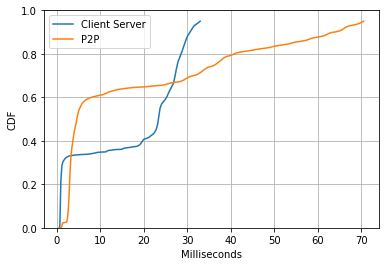

./experiment_rw_mono_30_rerun
./experiment_rw_p2p_30


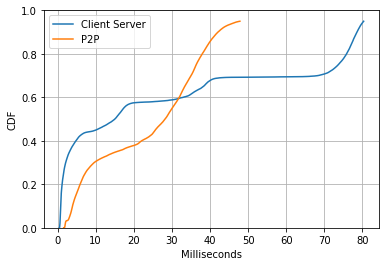

./experiment_rw_mono_60_rerun
./experiment_rw_p2p_60


ValueError: `bins` must be positive, when an integer

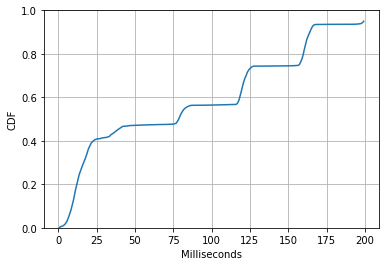

In [33]:
for experiments in [experiments10, experiments30, experiments60]:
    for experiment in experiments:
        log_files = [f for f in listdir(experiment) if isfile(join(experiment, f))]
        region_rtt = []
        move_rtt = []
        print(experiment)
        region_medians = []
        for log_file in log_files:
            #print(experiment)
            #print(log_file)
            file_path = experiment+"/"+log_file
            data = json.load(open(file_path, "rb"))
            region_data = data['region']
            move_data = data['move']
            region_rtt.extend(region_data)
            move_rtt.extend(move_data)
            region_medians.append(np.median(region_data))

        cdf(region_rtt, "region "+experiment)
        #cdf(move_rtt, "move "+experiment)
    plt.legend(['Client Server', 'P2P'])
    plt.show()
        
        
for idx, experiments in enumerate([experiments10, experiments30, experiments60]):
    for experiment in experiments:
        log_files = [f for f in listdir(experiment) if isfile(join(experiment, f))]
        region_rtt = []
        move_rtt = []
        print(experiment)
        region_medians = []
        for log_file in log_files:
            #print(experiment)
            #print(log_file)
            file_path = experiment+"/"+log_file
            data = json.load(open(file_path, "rb"))
            region_data = data['region']
            move_data = data['move']
            region_rtt.extend(region_data)
            move_rtt.extend(move_data)
            region_medians.append(np.median(region_data))

       # cdf(region_rtt, "region "+experiment)
        cdf(move_rtt, "move "+experiment)
    plt.legend(['Client Server', 'P2P'])
    plt.show()
    